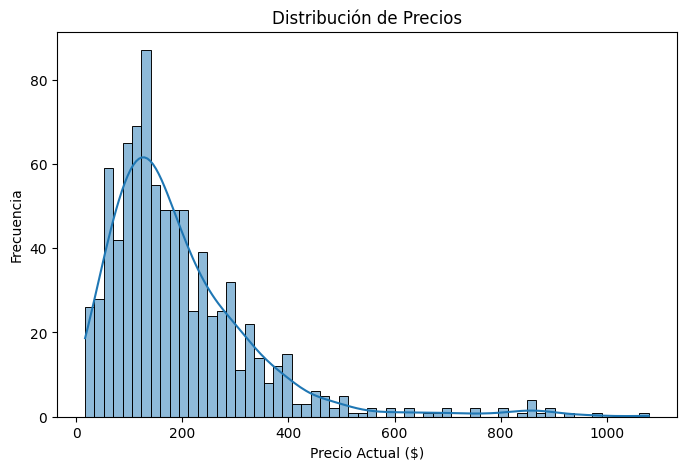

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos desde CSV
data = pd.read_csv("../res/dataset_final.csv")
data = data[data["marca"].str.lower() != "thuraya"]


# 1. Histograma de precios
plt.figure(figsize=(8,5))
sns.histplot(data["precio_actual"], bins=60, kde=True)
plt.title("Distribución de Precios")
plt.xlabel("Precio Actual ($)")
plt.ylabel("Frecuencia")
plt.savefig("../Other/histograma_precios.pdf", format="pdf")
plt.show()

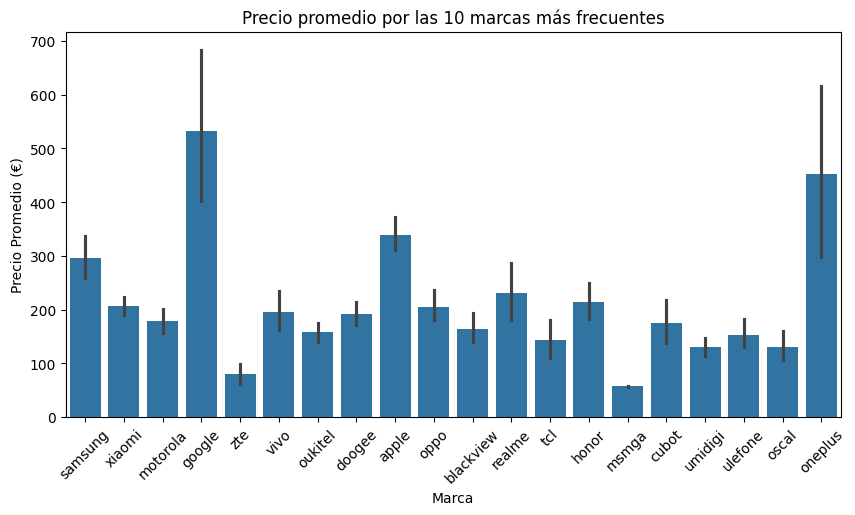

In [9]:

# 2. Precio promedio por marca (top 10 marcas más frecuentes)
top_marcas = data["marca"].value_counts().index[:20]
data_top_marcas = data[data["marca"].isin(top_marcas)]
plt.figure(figsize=(10,5))
sns.barplot(x=data_top_marcas["marca"], y=data_top_marcas["precio_actual"], estimator=lambda x: x.mean())
plt.xticks(rotation=45)
plt.title("Precio promedio por las 10 marcas más frecuentes")
plt.xlabel("Marca")
plt.ylabel("Precio Promedio (€)")
plt.savefig("../Other/precio_marca.pdf", format="pdf")
plt.show()



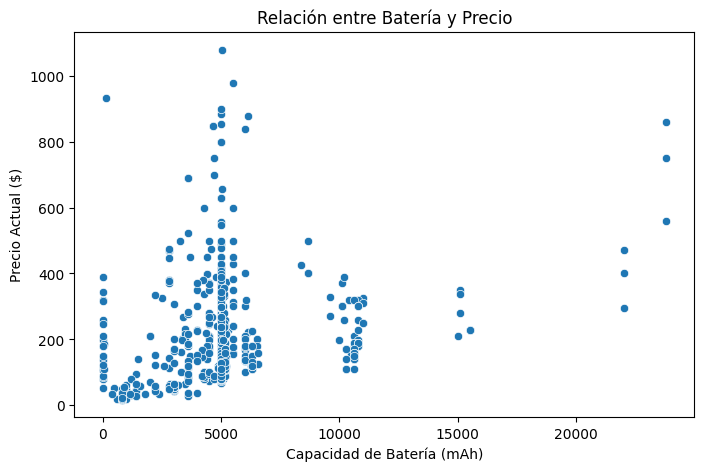

In [10]:
# 3. Relación entre batería y precio
plt.figure(figsize=(8,5))
sns.scatterplot(x=data["bateria"], y=data["precio_actual"])
plt.title("Relación entre Batería y Precio")
plt.xlabel("Capacidad de Batería (mAh)")
plt.ylabel("Precio Actual ($)")
plt.savefig("../Other/precio_bateria.pdf", format="pdf")
plt.show()

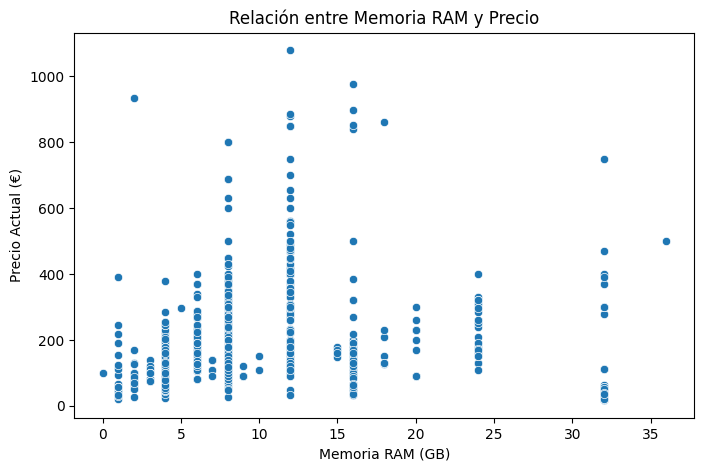

In [11]:
# 4. Relación entre memoria RAM y precio
plt.figure(figsize=(8,5))
sns.scatterplot(x=data["ram"], y=data["precio_actual"])
plt.title("Relación entre Memoria RAM y Precio")
plt.xlabel("Memoria RAM (GB)")
plt.ylabel("Precio Actual (€)")
plt.savefig("../Other/precio_memoria.pdf", format="pdf")
plt.show()

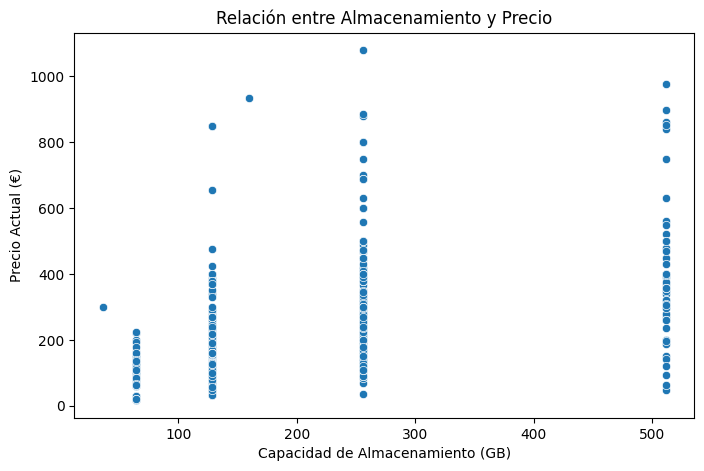

In [12]:
# 5. RELACION: ALMACENAMIE
plt.figure(figsize=(8,5))
sns.scatterplot(x=data["almacenamiento"], y=data["precio_actual"])
plt.title("Relación entre Almacenamiento y Precio")
plt.xlabel("Capacidad de Almacenamiento (GB)")
plt.ylabel("Precio Actual (€)")
plt.savefig("../Other/precio_almacenamiento.pdf", format="pdf")
plt.show()


In [13]:
# 6. ESTADISTICAS

# Variables de datos
marca_mas_cara = data.groupby("marca")["precio_actual"].mean().idxmax()
marca_mas_barata = data.groupby("marca")["precio_actual"].mean().idxmin()
marca_num = data["marca"].count()

media_precio = data["precio_actual"].mean()
max_precio = data["precio_actual"].max()
min_precio = data["precio_actual"].min()

ram_max = data["ram"].max()
ram_min = data["ram"].min()
ram_mean = data["ram"].mean()

bat_max = data["bateria"].max()
bat_min = data["bateria"].min()
bat_mean = data["bateria"].mean()

ano_max = data["ano"].max()
ano_min = data["ano"].min()
ano_mean = data["ano"].mean()

num_columnas = data.shape[1]
num_elementos = data.shape[0]

capacidad_almacenamiento_max = data["almacenamiento"].max()
capacidad_almacenamiento_min = data["almacenamiento"].min()
capacidad_almacenamiento_mean = data["almacenamiento"].mean()

tipo_pantalla_mas_comun = data["pantalla_tipo"].mode()[0]
tamano_pantalla_mas_comun = data["pantalla_in"].mode()[0]
tamano_pantalla_min = data["pantalla_in"].min()
tamano_pantalla_max = data["pantalla_in"].max()
tamano_pantalla_mean = data["pantalla_in"].mean()

peso_max = data["peso"].max()
peso_min = data["peso"].min()
peso_mean = data["peso"].mean()

promedio_max = data["promedio_valoraciones"].max()
promedio_min = data["promedio_valoraciones"].min()
promedio_mean = data["promedio_valoraciones"].mean()
GPU_Max = data["velocidad_cpu_ghz"].max()
GPU_Min = data["velocidad_cpu_ghz"].min()
GPU_Mean = data["velocidad_cpu_ghz"].mean()



# Abrir archivo MD
with open('../Other/dataset_stats.md', 'w') as file:
    file.write("# Estadísticas del Dataset\n\n")

    file.write("## Tabla\n")
    

    # Valores nulos
    nulos = data.isnull().sum()
    nulos = nulos[nulos > 0] 
    file.write("- **Nulos totales:**\n")
    
    if not nulos.empty:
        for col, count in nulos.items():
            file.write(f"- {col}: {count} nulos")
    else:
        file.write("No hay valores nulos en el dataset.")
    
    # Columnas y Filas
    file.write(f"\n- **Número de columnas:** {num_columnas}\n")
    file.write(f"- **Número de elementos (filas):** {num_elementos}\n")
    
    # Duplicados
    duplicados_id = data['_id'].duplicated().sum()  
    if duplicados_id > 0:
        file.write(f"\n**Se encontraron {duplicados_id} duplicados**\n")
        duplicados_lista = data[data['_id'].duplicated()]['_id'].unique()
        file.write(f"**_id duplicados:** {', '.join(map(str, duplicados_lista))}\n")
    else:
        file.write("- **Duplicados:** No se encontraron valores duplicados\n")
    

    file.write("\n\n")

    file.write("## Marcas\n")
    file.write(f"- **Marca con la media más cara:** {marca_mas_cara}\n")
    file.write(f"- **Marca con la media más barata:** {marca_mas_barata}\n\n")
    
    file.write("## Precios\n")
    file.write(f"- **Precio medio de todos los dispositivos:** {media_precio:.2f}€\n")
    file.write(f"- **Precio máximo registrado:** {max_precio:.2f}€\n")
    file.write(f"- **Precio mínimo registrado:** {min_precio:.2f}€\n\n")
    
    file.write("## Memoria RAM\n")
    file.write(f"- **Media de Memoria RAM:** {ram_mean:.0f} GB\n")
    file.write(f"- **Memoria RAM máxima:** {ram_max:.0f} GB\n")
    file.write(f"- **Memoria RAM mínima:** {ram_min:.2f} GB\n\n")
    
    file.write("## Batería\n")
    file.write(f"- **Media de batería:** {bat_mean:.0f} mAh\n")
    file.write(f"- **Batería máxima:** {bat_max:.0f} mAh\n")
    file.write(f"- **Batería mínima:** {bat_min:.0f} mAh\n\n")

    file.write("## Año de Modelo\n")
    file.write(f"- **Media del año:** {ano_mean:.0f}\n")
    file.write(f"- **Año más alto:** {ano_max:.0f}\n")
    file.write(f"- **Año más bajo:** {ano_min:.0f}\n\n")
    
    file.write("## Capacidad de Almacenamiento \n")
    file.write(f"- **Media de la Capacidad de almacenamiento digital:** {capacidad_almacenamiento_max:.0f} GB\n")
    file.write(f"- **Capacidad de almacenamiento digital (máxima):** {capacidad_almacenamiento_max:.0f} GB\n")
    file.write(f"- **Capacidad de almacenamiento digital (mínima):** {capacidad_almacenamiento_min:.0f} GB\n")
    
    file.write("## Pantalla\n")
    file.write(f"- **Tamaño de pantalla más común:** {tamano_pantalla_mas_comun} pulgadas\n")
    file.write(f"- **Tamaño de pantalla (máxima):** {tamano_pantalla_max} pulgadas\n")
    file.write(f"- **Tamaño de pantalla (mínima):** {tamano_pantalla_mean:.2f} pulgadas\n")
    
    file.write(f"- **Tipo de pantalla más común:** {tipo_pantalla_mas_comun}\n")
    
    file.write("## GPU\n")
    file.write(f"- **Media de celocidad de GPU:** {GPU_Mean:.2f}\n")
    file.write(f"- **Velocidad de GPU mas alta:** {GPU_Max}\n")
    file.write(f"- **Velocidad de GPU mas baja:** {GPU_Min}\n")

    file.write("## Valoraciones\n")
    file.write(f"- **Media del promedio de valoraciones:** {promedio_mean:.2f}\n")
    file.write(f"- **Promedio de valoraciones máximo:** {promedio_max:.2f}\n")
    file.write(f"- **Promedio de valoraciones minimo:** {promedio_min}\n")

    file.write("## Peso\n")
    file.write(f"- **Media de Peso (g):** {peso_max:.0f}\n")
    file.write(f"- **Peso máximo (g):** {peso_max:.0f}\n")
    file.write(f"- **Peso mínimo (g):** {peso_min:.0f}\n")


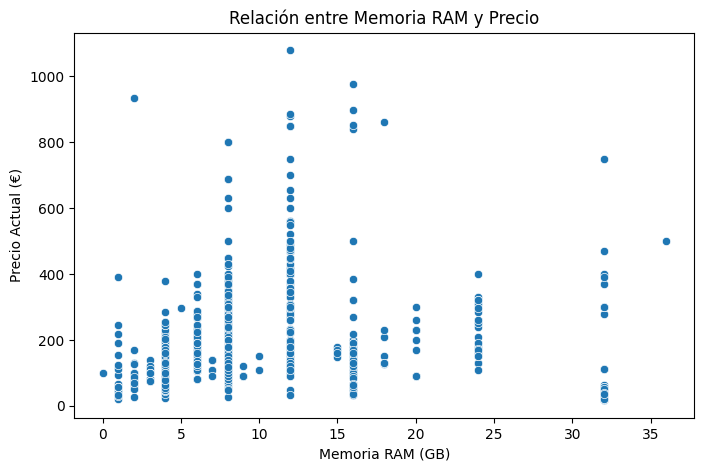

In [14]:
from matplotlib.backends.backend_pdf import PdfPages

# Crear un archivo PDF para guardar todas las figuras
with PdfPages('../Other/dashboard.pdf') as pdf:
    # 1. Histograma de precios
    plt.figure(figsize=(8,5))
    sns.histplot(data["precio_actual"], bins=60, kde=True)
    plt.title("Distribución de Precios")
    plt.xlabel("Precio Actual ($)")
    plt.ylabel("Frecuencia")
    pdf.savefig()  # Guardar la figura en el PDF
    plt.close()

    # 3. Relación entre batería y precio
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=data["bateria"], y=data["precio_actual"])
    plt.title("Relación entre Batería y Precio")
    plt.xlabel("Capacidad de Batería (mAh)")
    plt.ylabel("Precio Actual ($)")
    pdf.savefig()  # Guardar la figura en el PDF
    plt.close()

    # 4. Relación entre memoria RAM y precio
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=data["ram"], y=data["precio_actual"])
    plt.title("Relación entre Memoria RAM y Precio")
    plt.xlabel("Memoria RAM (GB)")
    plt.ylabel("Precio Actual (€)")
    pdf.savefig()  # Guar"./FlasckServer/app.py"
    # 5. Relación entre almacenamiento y precio
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=data["almacenamiento"], y=data["precio_actual"])
    plt.title("Relación entre Almacenamiento y Precio")
    plt.xlabel("Capacidad de Almacenamiento (GB)")
    plt.ylabel("Precio Actual (€)")
    pdf.savefig()  # Guardar la figura en el PDF
    plt.close()